| # | strategy            | accuracy (train) | accuracy (test)|
|---|---------------------|------------------|----------------|
| 1 | x -> y              | 98%              | 92,7%          |
| 2 | clean(x) -> y       |                  |                |
| 3 | clean(x) + sbj -> y | 98% - ?          | 92,6% - ?      |

RandomForest -- n_estimators = 100, random_state = 42

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
PATH_TRAIN_X = "../UCI_HAR_Dataset/train/X_train.txt"
PATH_TRAIN_Y = "../UCI_HAR_Dataset/train/y_train.txt"

PATH_TEST_X = "../UCI_HAR_Dataset/test/X_test.txt"
PATH_TEST_Y = "../UCI_HAR_Dataset/test/y_test.txt"

PATH_TRAIN_SBJ = "../UCI_HAR_Dataset/train/subject_train.txt"

PATH_TEST_SBJ = "../UCI_HAR_Dataset/test/subject_test.txt"

PATH_FT = "../UCI_HAR_Dataset/features.txt"
features = pd.read_csv(PATH_FT, sep=" ", header=None, index_col=0).reset_index()

--- 
# Phase 1

### TRAINING

In [29]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}")

x_train shape: (7352, 561)
y_train shape: (7352, 1)


In [30]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (5146, 561)
X_test shape: (2206, 561)
y_train shape: (5146, 1)
y_test shape: (2206, 1)


In [31]:
# RandomForest implementation
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9805077062556664


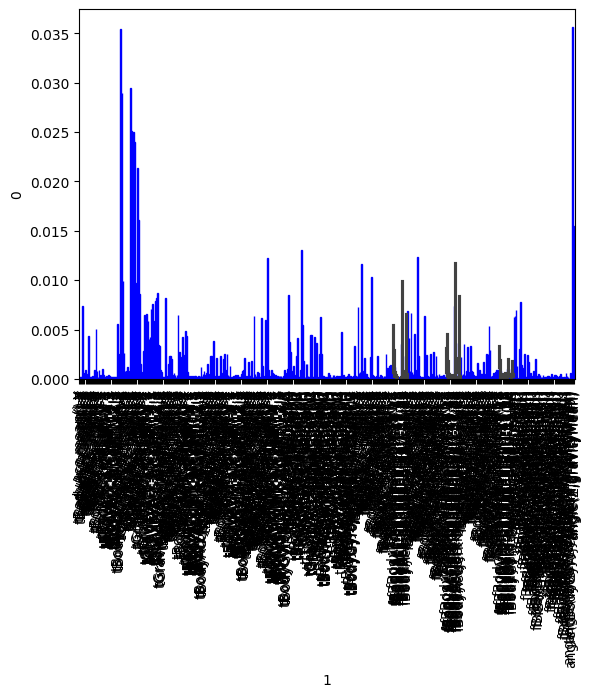

In [32]:
# Components plotting
importances = pd.DataFrame(model_1.feature_importances_, index=features[1]).reset_index()
sns.barplot(x=importances[1], y=importances[0], ec="b")
plt.xticks(rotation=90)
plt.show()

### TESTING

In [33]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

x_test shape: (2947, 561)
y_test shape: (2947, 1)


In [34]:
y_pred_eval = model_1.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

0.9270444519850696


--- 
# Phase 2

### TRAINING

In [35]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}")

x_train shape: (7352, 561)
y_train shape: (7352, 1)


In [36]:
# Null values
print(df_x_train.isnull().values.any())

False


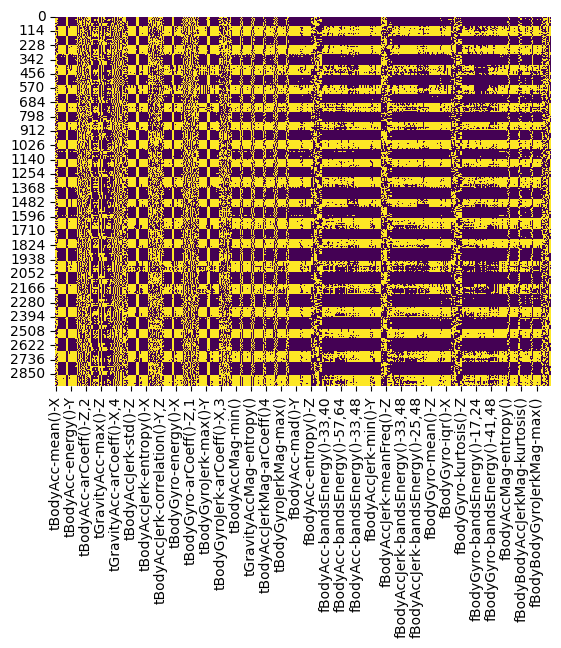

In [39]:
sns.heatmap(df_x_test>df_x_test.mean(), cbar=False, cmap='viridis')
plt.show()

Normalizza... (vedi gaussiana o boh)

In [ ]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

In [ ]:
# RandomForest implementation
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

print(accuracy_score(y_test, y_pred))

In [ ]:
# Components plotting
importances = pd.DataFrame(model_2.feature_importances_, index=features[1]).reset_index()
sns.barplot(x=importances[1], y=importances[0], ec="b")
plt.xticks(rotation=90)
plt.show()

### TESTING

In [ ]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

In [ ]:
y_pred_eval = model_2.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

--- 
# Phase 3

Add sbj column

In [73]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

df_sbj_train = pd.read_fwf(PATH_TRAIN_SBJ, header=None)
df_x_train['user'] = df_sbj_train.values

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}\nsbj_train shape: {df_sbj_train.shape}")

x_train shape: (7352, 562)
y_train shape: (7352, 1)
sbj_train shape: (7352, 1)


In [75]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (5146, 562)
X_test shape: (2206, 562)
y_train shape: (5146, 1)
y_test shape: (2206, 1)


In [76]:
# RandomForest implementation
model_3 = RandomForestClassifier(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9805077062556664


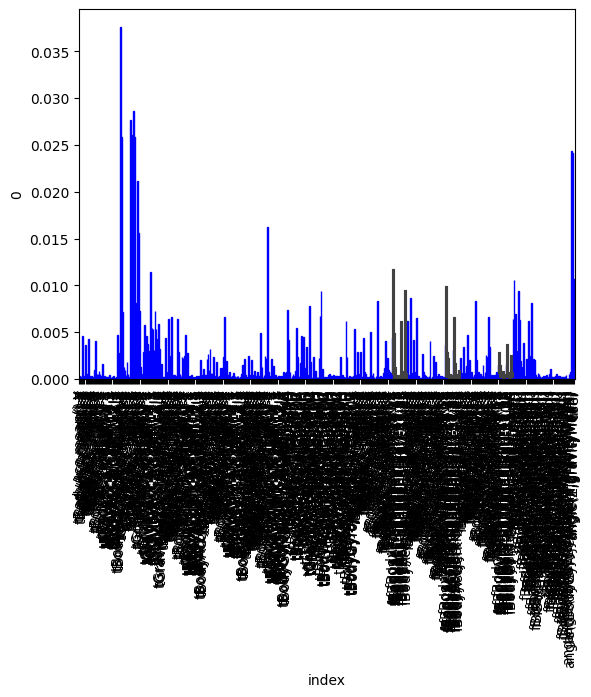

In [103]:
features_update = df_x_train.columns

# Components plotting
importances = pd.DataFrame(model_3.feature_importances_, index=features_update).reset_index()
sns.barplot(x=importances["index"], y=importances[0], ec="b")
plt.xticks(rotation=90)
plt.show()

In [112]:

print(f"importance\n['user'] = {importances.loc[561,0]}\non\nmax = {importances.loc[:,0].max()}\nmin = {importances.loc[:,0].min()}\navg = {importances.loc[:,0].mean()}")

importance
['user'] = 0.000327156374414841
on
max = 0.03763245884720484
min = 6.791711172272461e-05
avg = 0.0017793594306049821


### TESTING

In [97]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

df_sbj_test = pd.read_fwf(PATH_TEST_SBJ, header=None)
df_x_test['user'] = df_sbj_test.values

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

x_test shape: (2947, 562)
y_test shape: (2947, 1)


In [98]:
y_pred_eval = model_3.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

0.9256871394638616


---